### The goal of this notebook is to familiarize with SoftMax regression to more than two categories, categorical predictions, and the MNIST handwritten dataset.  

In [1]:
import time
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print (__doc__)

Automatically created module for IPython interactive environment


In [23]:
X, y = fetch_openml('mnist_784', version=1, return_X_y = True)
train_size = 50000
test_size = 10000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]
print (X.shape)
X = X.reshape((X.shape[0],-1))
print (X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size = test_size)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

(70000, 784)
(70000, 784)


In [24]:
begin = time.time()
clf = LogisticRegression(C=1e5, multi_class='multinomial', penalty='l2',solver='sag',tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0)*100
score = clf.score(X_test,y_test)
end = time.time()
print ('Example run in %.3f s' %(end-begin))
print ('Sparsity with L2 penalty: %.2f%%' %sparsity)
print ('Test score with L2 penalty: %.4f' %score)

Example run in 5.988 s
Sparsity with L2 penalty: 8.80%
Test score with L2 penalty: 0.8939


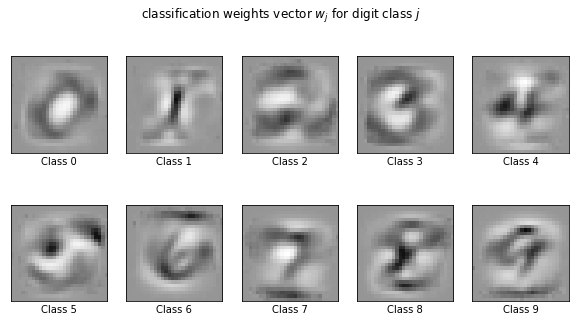

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

coef = clf.coef_.copy()
plt.figure(figsize=(10,5))
scale = np.abs(coef).max()

for i in range(10):
    l2_plot = plt.subplot(2,5,i+1)
    l2_plot.imshow(coef[i].reshape(28,28), interpolation='nearest', cmap = plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' %i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')
plt.show()

In [31]:
a = [1,2,3,4,5]
print (a)
b = a
print (b)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [32]:
b = [2,3,4,5,6]
print (b)
print (a)

[2, 3, 4, 5, 6]
[1, 2, 3, 4, 5]
